USERNAME : idondidong

EMAIL : idondidong@gmail.com

IMPORT SEMUA BAHAN

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
import zipfile,os,shutil
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator


LOAD DATASET

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-01 09:15:50--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.58MB/s    in 44s     

2020-11-01 09:16:36 (6.92 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



EKSTRAK FILE DARI ZIP

In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp') #tempatkan file pada folder 'tmp'
zip_ref.close()

BUAT CALLBACK UNTUK MENGHENTIKAN TRAINING JIKA NILAI AKURASI DIATAS 99%.
BATAS MINIMAL AKURASI PADA TUGAS INI 85%

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.99): #batas akurasi yang diinginkan
      print("\nAkurasi lebih dari 99%, stop latih!")
      self.model.stop_training = True

callbacks = myCallback()

MEMBUAT FOLDER DATA TRAIN DAN VALIDASI

In [ ]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
train_roc = os.path.join(train_dir, 'roc')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

In [ ]:
#membuat folder data training
os.mkdir(train_roc) #rock
os.mkdir(train_pap) #paper
os.mkdir(train_sci) #scissors
#membuat folder data validasi
os.mkdir(val_roc) #rock
os.mkdir(val_pap) #paper
os.mkdir(val_sci) #scissors

MEMECAH DATA, AMBIL DATA VALIDASI 0.4 ATAU 40% DARI TOTAL DATA

In [ ]:
#mengambil 40% dari data untuk dijadikan data validasi
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

In [ ]:
for file in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(train_pap,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(train_sci,file))
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(val_pap,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(val_sci,file))

AUGMENTASI DAN GENERATE IMAGE

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

UJI VALIDASI

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41, # 1312 images = batch_size * steps
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27, # 876 images = batch_size * steps
    verbose =2,
      callbacks=[callbacks] # callback dipanggil untuk membatasi hitung validasi, jika lebih dari 99% maka akan berhenti
)

Epoch 1/20
41/41 - 77s - loss: 1.0237 - accuracy: 0.5343 - val_loss: 0.7718 - val_accuracy: 0.6852
Epoch 2/20
41/41 - 76s - loss: 0.5561 - accuracy: 0.7973 - val_loss: 0.3642 - val_accuracy: 0.8623
Epoch 3/20
41/41 - 77s - loss: 0.2819 - accuracy: 0.8994 - val_loss: 0.2552 - val_accuracy: 0.9155
Epoch 4/20
41/41 - 76s - loss: 0.2475 - accuracy: 0.9169 - val_loss: 0.2244 - val_accuracy: 0.9190
Epoch 5/20
41/41 - 76s - loss: 0.1648 - accuracy: 0.9337 - val_loss: 0.1875 - val_accuracy: 0.9433
Epoch 6/20
41/41 - 76s - loss: 0.1580 - accuracy: 0.9444 - val_loss: 0.2964 - val_accuracy: 0.9155
Epoch 7/20
41/41 - 78s - loss: 0.1496 - accuracy: 0.9466 - val_loss: 0.1799 - val_accuracy: 0.9410
Epoch 8/20
41/41 - 76s - loss: 0.1153 - accuracy: 0.9596 - val_loss: 0.1942 - val_accuracy: 0.9491
Epoch 9/20
41/41 - 76s - loss: 0.1042 - accuracy: 0.9672 - val_loss: 0.1559 - val_accuracy: 0.9583
Epoch 10/20
41/41 - 76s - loss: 0.0617 - accuracy: 0.9809 - val_loss: 0.1982 - val_accuracy: 0.9479
Epoch 11/

PENGUJIAN MODEL PADA DATA BARU

Saving tangan-terasa-panas-seperti-terbakar-ini-6-penyebabnya-1589254242.jpg to tangan-terasa-panas-seperti-terbakar-ini-6-penyebabnya-1589254242.jpg
tangan-terasa-panas-seperti-terbakar-ini-6-penyebabnya-1589254242.jpg
paper


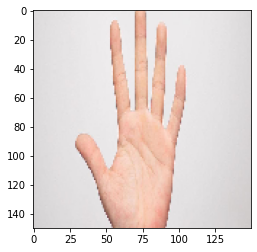

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload() #untuk upload file

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

#klasifikasi akhri, paper, rock atau scissors
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')